In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class nystrom:
    def __init__(self, n, n_int, lam, a, b):
        #Initialize n+1 x n+1 matrix with all zeros
        self.matrix = np.zeros((n+1,n+1))
        self.t_values = np.zeros(n+1)
        self.weights = np.zeros(n+1)
        self.y_values = np.zeros(n+1)
        self.solution = np.zeros(n+1)
        self.true_solution = np.zeros(n+1)
        self.h = (b-a) / n
        self.int_x_values = np.zeros(n_int+1)
        
    def set_t_values(self):
        for i in range(0,n+1):
            self.t_values[i] = a + i*self.h

    def set_weights(self):
        self.weights[0] = 0.5
        self.weights[n] = 0.5
        for i in range(1,n):
            self.weights[i] = 1
        self.weights = self.weights*self.h;
    
    def build_matrix(self):
        for i in range(0,n+1):
            for j in range(0,n+1):
                self.matrix[i,j] = self.weights[j]
        
        self.matrix = (-1/(2*np.pi))*self.matrix + (lam)*np.identity(n+1)
        
    def set_y_values(self):
        for i in range(0,n+1):
            self.y_values[i] = np.exp(np.cos(self.t_values[i])) * (np.cos(np.sin(self.t_values[i])))
            
    def y_function(self,t):
        return np.exp(np.cos(t)) * (np.cos(np.sin(t)))
    
    def solve_linear_system(self):
        matrix_inverse = np.linalg.inv(self.matrix)
        self.solution = np.matmul(matrix_inverse,self.y_values)
        return self.solution
    
    def solve_for_u(self,r,theta):
        u = 0
        for i in range(0,n+1):
            u = u + (1/(2*np.pi))*( (r*np.cos(self.t_values[i] - theta ) - 1) / (1 + r*r - 2*r*np.cos(self.t_values[i] - theta)) ) *self.weights[i]*self.solution[i]
            
        return u
    
    def nys_interp(self):
        int_t_values = np.zeros(n_int+1)
        h_int = (b-a)/n_int
        for i in range(0,n_int+1):
            int_t_values[i] = a + i*h_int
            asum = 0
            for j in range(0,n+1):
                asum = asum + (1/lam)*self.weights[j]*(-1/(2*np.pi))*self.solution[j]
            
            asum = asum + (1/lam)*self.y_function(int_t_values[i])
            self.int_x_values[i] = asum
        
        return self.int_x_values
    
    def interp_error(self):
        h_int = (b-a)/n_int
        true_sol_int = np.zeros(n_int+1)
        int_t_values = np.zeros(n_int+1)
        
        for i in range(0,n_int+1):
            int_t_values[i] = a + i*h_int
            true_sol_int[i] = np.exp(np.cos(int_t_values[i])) * (np.cos(np.sin(int_t_values[i])))
        
        error = np.zeros(n_int+1)
        for i in range(0,n_int+1):
            error[i] = np.abs(true_sol_int[i] - self.int_x_values[i])    
        
        return np.amax(error)
        #return error
    
    def compute_error(self):
        for i in range(0,n+1):
            self.true_solution[i] = np.exp(np.cos(self.t_values[i])) * (np.cos(np.sin(self.t_values[i])))
            
        error = np.zeros(n+1)
        for i in range(0,n+1):
            error[i] = np.abs(self.true_solution[i] - self.solution[i])
            
        return np.amax(error)
    
    def return_t(self):
        return self.t_values

In [12]:
n = 50
n_int = 10000
a = 0
b = 2*np.pi
lam = -0.5
nys_test = nystrom(n, n_int, lam, a, b)
nys_test.set_t_values()
nys_test.set_weights()
nys_test.build_matrix()
nys_test.set_y_values()


mu = nys_test.solve_linear_system()
u = nys_test.solve_for_u(0.5,0)
utrue = np.exp(0.5)

t = nys_test.return_t()

print(u)
print(utrue)


1.3153879373668018
1.6487212707001282


Text(0, 0.5, '$\\mu (t)$')

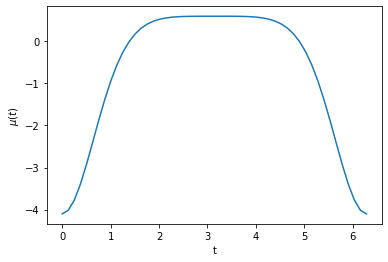

In [13]:
plt.plot(t,mu)
plt.xlabel('t')
plt.ylabel('$\mu (t)$')

In [21]:
xn = nys_test.nys_interp()
t = nys_test.return_t()
error = nys_test.compute_error()
error_int = nys_test.interp_error()

print(error)
print(error_int)

6.765923524921547
9.543767445832724
